## Setup for git and dvc

In [1]:
!conda activate venv/

In [2]:
!git init

Reinitialized existing Git repository in C:/Users/anany/Desktop/CMi/AML/Assignment_2/.git/


In [3]:
!git status

HEAD detached at d8ec50f
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    .dvc/.gitignore
	deleted:    .dvc/config
	deleted:    data/.gitignore
	deleted:    data/emails.csv.dvc
	deleted:    data/raw_data.csv.dvc
	deleted:    data/test.csv.dvc
	deleted:    data/train.csv.dvc
	deleted:    data/validation.csv.dvc

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	.ipynb_checkpoints/
	data/emails.csv
	prepare.ipynb
	requirements.txt
	venv/

no changes added to commit (use "git add" and/or "git commit -a")


In [4]:
#pip install dvc

In [5]:
!dvc init -f

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [6]:
!git status

HEAD detached at d8ec50f
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    data/.gitignore
	deleted:    data/emails.csv.dvc
	deleted:    data/raw_data.csv.dvc
	deleted:    data/test.csv.dvc
	deleted:    data/train.csv.dvc
	deleted:    data/validation.csv.dvc

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	.ipynb_checkpoints/
	data/emails.csv
	prepare.ipynb
	requirements.txt
	venv/

no changes added to commit (use "git add" and/or "git commit -a")


In [7]:
!git commit -m "dvc init"

HEAD detached at d8ec50f
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    data/.gitignore
	deleted:    data/emails.csv.dvc
	deleted:    data/raw_data.csv.dvc
	deleted:    data/test.csv.dvc
	deleted:    data/train.csv.dvc
	deleted:    data/validation.csv.dvc

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	.ipynb_checkpoints/
	data/emails.csv
	prepare.ipynb
	requirements.txt
	venv/

no changes added to commit (use "git add" and/or "git commit -a")


In [8]:
#Tracking the data file 
!dvc add data/emails.csv


To track the changes with git, run:

	git add 'data\emails.csv.dvc' 'data\.gitignore'

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



In [9]:
!git add data/emails.csv.dvc

In [10]:
!git add data/.gitignore

In [11]:
!git commit -m "adding data"

[detached HEAD cc811ab] adding data
 1 file changed, 4 deletions(-)


## Loading data

In [12]:
import pandas as pd
import os
os.rename("data/emails.csv", "data/raw_data.csv")
data = pd.read_csv('data/raw_data.csv')

In [13]:
!dvc add data/raw_data.csv


To track the changes with git, run:

	git add 'data\.gitignore' 'data\raw_data.csv.dvc'

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



In [14]:
!git add data/raw_data.csv.dvc

In [15]:
!git commit -m "updating data"

HEAD detached from d8ec50f
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   data/.gitignore
	deleted:    data/test.csv.dvc
	deleted:    data/train.csv.dvc
	deleted:    data/validation.csv.dvc

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	.ipynb_checkpoints/
	prepare.ipynb
	requirements.txt
	venv/

no changes added to commit (use "git add" and/or "git commit -a")


#### Cleaning the text

In [16]:
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d', '', text)
    
    # Remove 'subject' if it is the first word
    if text.startswith('subject'):
        text = text[len('subject'):].strip()
        
    # Tokenization and stemming
    words = word_tokenize(text)
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    
    return ' '.join(words)
           

data['text'] = data['text'].apply(lambda x: clean_text(x))
data['length'] = data['text'].apply(lambda x:len(str(x)))
data['words'] = data['text'].apply(lambda x:len(str(x).split()))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anany\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\anany\AppData\Local\Temp\ipykernel_8360\3093986477.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


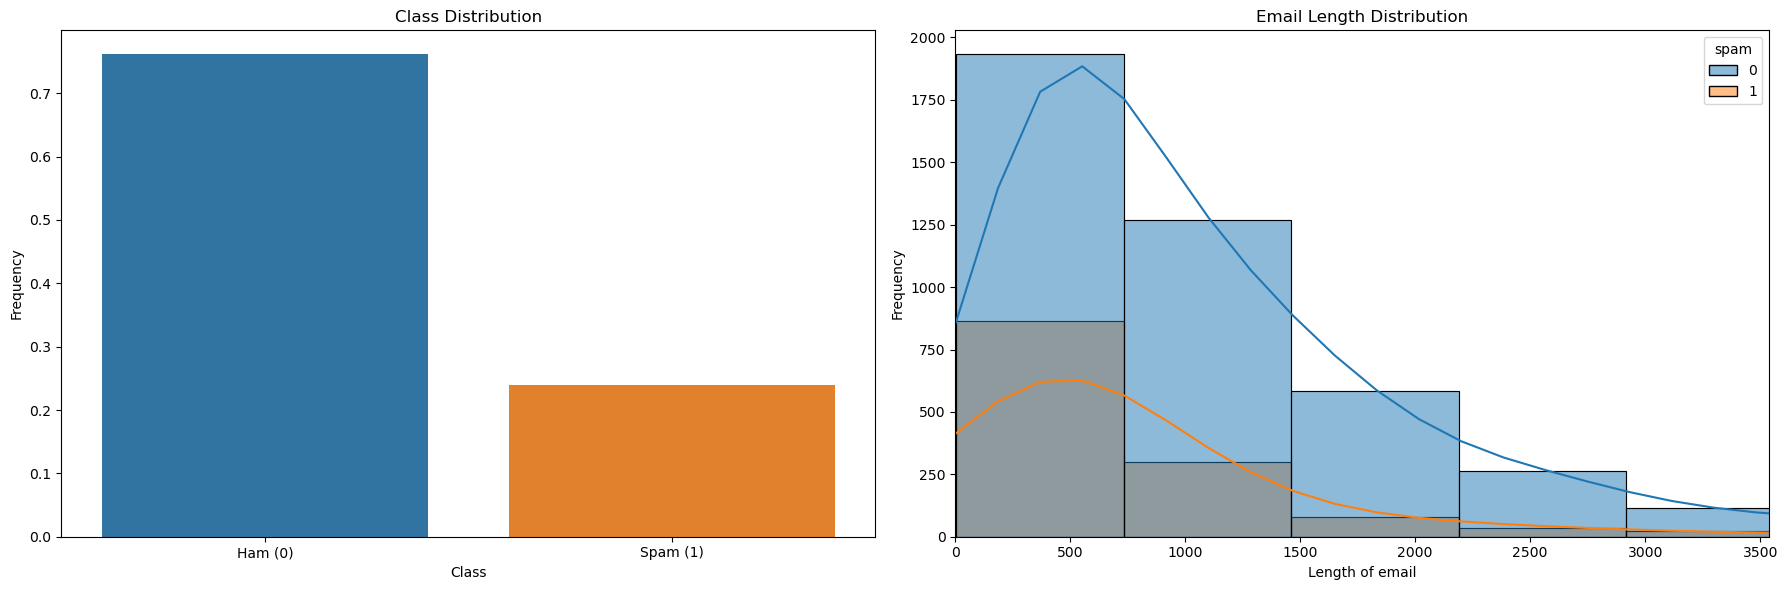

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


class_distribution = data['spam'].value_counts(normalize=True)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=class_distribution.index, y=class_distribution.values, ax=ax[0])
ax[0].set_title('Class Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')
ax[0].set_xticklabels(['Ham (0)', 'Spam (1)'])

sns.histplot(data, x='length', hue='spam', bins=50, ax=ax[1], kde=True)
ax[1].set_title('Email Length Distribution')
ax[1].set_xlabel('Length of email')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim(0, data['length'].quantile(0.95))  # Limit to 95th percentile for better visualization

plt.tight_layout()
plt.show()

## Splitting data in train, validation and test datasets

In [18]:
from sklearn.model_selection import train_test_split

X = data[['text', 'length', 'words']]
y = data['spam']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
validation = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.to_csv('data/train.csv', index=False)
validation.to_csv('data/validation.csv', index=False)
test.to_csv('data/test.csv', index=False)

In [19]:
!dvc add data/train.csv data/validation.csv data/test.csv


To track the changes with git, run:

	git add 'data\test.csv.dvc' 'data\validation.csv.dvc' 'data\train.csv.dvc' 'data\.gitignore'

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



In [20]:
!git add data/test.csv.dvc data/validation.csv.dvc data/train.csv.dvc data/.gitignore

In [21]:
!git commit -m "split of data"

[detached HEAD 4fea8b0] split of data
 4 files changed, 10 insertions(+), 6 deletions(-)


#### Changing the seed and updating the files

In [22]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=45)

train = pd.concat([X_train, y_train], axis=1)
validation = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.to_csv('data/train.csv', index=False)
validation.to_csv('data/validation.csv', index=False)
test.to_csv('data/test.csv', index=False)

In [23]:
!dvc add data/train.csv data/validation.csv data/test.csv


To track the changes with git, run:

	git add 'data\test.csv.dvc' 'data\train.csv.dvc' 'data\validation.csv.dvc'

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



In [24]:
!dvc config core.autostage true

In [25]:
!git add data/test.csv.dvc data/validation.csv.dvc data/train.csv.dvc data/.gitignore

In [26]:
!git commit -m "split of data after updating seed"

[detached HEAD 7ff0d9a] split of data after updating seed
 3 files changed, 6 insertions(+), 6 deletions(-)


In [27]:
!git log

commit 7ff0d9aa27bb5595822acc803319815bc577f4f5
Author: Ananya2702 <ananyakaushal2702@gmail.com>
Date:   Wed Feb 21 15:43:37 2024 +0530

    split of data after updating seed

commit 4fea8b0a2e4da2b171a12004a499107a121b4da5
Author: Ananya2702 <ananyakaushal2702@gmail.com>
Date:   Wed Feb 21 15:43:31 2024 +0530

    split of data

commit cc811ab8ee01a0737eb29e5a4676776c4434cca8
Author: Ananya2702 <ananyakaushal2702@gmail.com>
Date:   Wed Feb 21 15:42:42 2024 +0530

    adding data

commit d8ec50f526b87664fe4a4b92329582a62c861c71
Author: Ananya2702 <ananyakaushal2702@gmail.com>
Date:   Wed Feb 21 15:11:48 2024 +0530

    split of data after updating seed

commit e241db8e77a2e6ca8c7ae5c3cfe55392a483474e
Author: Ananya2702 <ananyakaushal2702@gmail.com>
Date:   Wed Feb 21 15:11:31 2024 +0530

    split of data

commit b9eb100cd3a245537d974780caf4bc01730a0fb6
Author: Ananya2702 <ananyakaushal2702@gmail.com>
Date:   Wed Feb 21 15:10:32 2024 +0530

    adding data

commit f0991f98dd85e59a74e2c

In [29]:
!git checkout 4fea8b0a2e4da2b171a12004a499107a121b4da5

M	.dvc/config


Previous HEAD position was e241db8 split of data
HEAD is now at 4fea8b0 split of data


In [30]:
!dvc checkout

M       data\test.csv
M       data\train.csv
M       data\validation.csv
A       data\emails.csv


In [31]:
print("______________________________________________________________________")
print("Distribution of Target variables before changing seed : ")

train = pd.read_csv('data/train.csv')
validation = pd.read_csv('data/validation.csv')
test = pd.read_csv('data/test.csv')

print("\nTrain split:\n")
print(train['spam'].value_counts())
print("\nValidation split:\n")
print(validation['spam'].value_counts())
print("\nTest split:\n")
print(test['spam'].value_counts())
print("______________________________________________________________________")


______________________________________________________________________
Distribution of Target variables before changing seed : 

Train split:

spam
0    2628
1     808
Name: count, dtype: int64

Validation split:

spam
0    876
1    270
Name: count, dtype: int64

Test split:

spam
0    856
1    290
Name: count, dtype: int64
______________________________________________________________________


In [32]:
!git checkout 7ff0d9aa27bb5595822acc803319815bc577f4f5

M	.dvc/config


Previous HEAD position was 4fea8b0 split of data
HEAD is now at 7ff0d9a split of data after updating seed


In [33]:
!dvc checkout

M       data\validation.csv
M       data\train.csv
M       data\test.csv


In [34]:
print("______________________________________________________________________")
print("Distribution of Target variables after changing seed : ")

train = pd.read_csv('data/train.csv')
validation = pd.read_csv('data/validation.csv')
test = pd.read_csv('data/test.csv')

print("\nTrain split:\n")
print(train['spam'].value_counts())
print("\nValidation split:\n")
print(validation['spam'].value_counts())
print("\nTest split:\n")
print(test['spam'].value_counts())
print("______________________________________________________________________")


______________________________________________________________________
Distribution of Target variables after changing seed : 

Train split:

spam
0    2605
1     831
Name: count, dtype: int64

Validation split:

spam
0    880
1    266
Name: count, dtype: int64

Test split:

spam
0    875
1    271
Name: count, dtype: int64
______________________________________________________________________


In [35]:
!git status

HEAD detached at 7ff0d9a
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	.ipynb_checkpoints/
	prepare.ipynb
	requirements.txt
	venv/

no changes added to commit (use "git add" and/or "git commit -a")


In [37]:
!git add .gitignore prepare.ipynb requirements.txt venv/

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The fi

In [38]:
!git commit -m "Adding all the files"

[detached HEAD da0a578] Adding all the files
 14726 files changed, 2073795 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 prepare.ipynb
 create mode 100644 requirements.txt
 create mode 100644 venv/.nonadmin
 create mode 100644 venv/DLLs/_asyncio.pyd
 create mode 100644 venv/DLLs/_bz2.pyd
 create mode 100644 venv/DLLs/_ctypes.pyd
 create mode 100644 venv/DLLs/_ctypes_test.pyd
 create mode 100644 venv/DLLs/_decimal.pyd
 create mode 100644 venv/DLLs/_elementtree.pyd
 create mode 100644 venv/DLLs/_hashlib.pyd
 create mode 100644 venv/DLLs/_lzma.pyd
 create mode 100644 venv/DLLs/_msi.pyd
 create mode 100644 venv/DLLs/_multiprocessing.pyd
 create mode 100644 venv/DLLs/_overlapped.pyd
 create mode 100644 venv/DLLs/_queue.pyd
 create mode 100644 venv/DLLs/_socket.pyd
 create mode 100644 venv/DLLs/_sqlite3.pyd
 create mode 100644 venv/DLLs/_ssl.pyd
 create mode 100644 venv/DLLs/_testbuffer.pyd
 create mode 100644 venv/DLLs/_testcapi.pyd
 create mode 100644 venv/DLLs/_testcons

Auto packing the repository in background for optimum performance.
See "git help gc" for manual housekeeping.



 create mode 100644 venv/Lib/site-packages/pygments/lexers/arturo.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/asc.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/asm.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/asn1.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/automation.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/bare.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/basic.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/bdd.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/berry.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/bibtex.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/blueprint.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/boa.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/bqn.py
 create mode 100644 venv/Lib/site-packages/pygments/lexers/business.py
 create mode 100644 venv/Lib/site-packages/py

In [39]:
!git status

HEAD detached from 7ff0d9a
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config
	modified:   prepare.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/

no changes added to commit (use "git add" and/or "git commit -a")


In [40]:
!git remote add origin git@github.com:Ananya2702/AML-Assignments.git

In [42]:
!git push origin main –force

error: src refspec main does not match any
error: src refspec â€“force does not match any
error: failed to push some refs to 'github.com:Ananya2702/AML-Assignments.git'
